In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
gauge_nums=range(0,1263)

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [6]:
# file = "12hrs_2018_v2_part0.csv"
# em='bc005'
# # Process each file
# fp = f"../../../ProcessedData/IndependentEvents/UKCP18_30mins/{em}/{gauge_num}/{file}"
# # Read in the event
# csv =pd.read_csv(fp)

em='bc005'

In [9]:
lens=[]
trimmed_lens = []
divisable_by_3 = []

# Process each gauge

for gauge_num in gauge_nums:
    # the gauges that didn't work for finding events
    if gauge_num not in [444, 827, 888]:
        # Excluding ones near windfarms
        if gauge_num not in [27,36,57,61,75,97,101,106,120,132,190,204, 239, 285,348,376]:
            if gauge_num % 100 == 0:
                print(gauge_num)

            # Create a list of all the event CSVs
            files = [f for f in os.listdir(f"../../../ProcessedData/IndependentEvents/UKCP18_30mins/{em}/{gauge_num}/") if f.endswith('.csv')]
            files = np.sort(files)

            # Process each file
            files = [f for f in os.listdir(f"../../../ProcessedData/IndependentEvents/UKCP18_30mins/{em}/{gauge_num}/") if f.endswith('.csv')]
            for file in files:
                fp = f"../../../ProcessedData/IndependentEvents/UKCP18_30mins/{em}/{gauge_num}/{file}"
                # Read in the event
                csv =pd.read_csv(fp)
                # Find the number of datapoints
                num_datapoints = len(csv)
                # Find the length of event in hours
                event_length = num_datapoints/2
                
                #### Remove leading trailing zeros
                first_non_zero_index = csv[csv['precipitation (mm)'] > 0.01].index[0]
                last_non_zero_index = csv[csv['precipitation (mm)'] > 0.01].index[-1]

                # Slice the DataFrame from the first to the last non-zero value
                trimmed_df = csv.loc[first_non_zero_index:last_non_zero_index]
                
                trimmed_lens.append(len(trimmed_df))
                
                if (len(trimmed_df) % 3 == 0):
                    divisable_by_3.append(len(trimmed_df))


0
100
200
300
400
500
600
700
800
900
1000
1100
1200


In [13]:
len(divisable_by_3)
len(trimmed_lens)
41648/121063

0.3440192296572859

In [76]:
len(divisable_by_3)

TypeError: 'int' object is not callable

(array([6.1443e+04, 3.1747e+04, 2.0560e+04, 5.5970e+03, 1.1990e+03,
        3.3800e+02, 1.3300e+02, 2.7000e+01, 1.8000e+01, 1.0000e+00]),
 array([  1. ,  20.3,  39.6,  58.9,  78.2,  97.5, 116.8, 136.1, 155.4,
        174.7, 194. ]),
 <BarContainer object of 10 artists>)

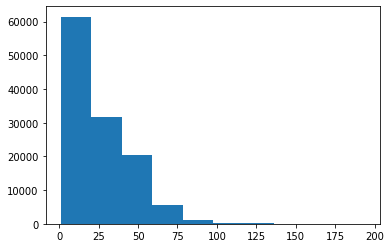

In [63]:
import matplotlib.pyplot as plt
plt.hist(trimmed_lens)

In [35]:
files = [f for f in os.listdir(f"../../../ProcessedData/IndependentEvents/UKCP18_30mins/{em}/{gauge_num}/") if f.endswith('.csv')]
for file in files:
    fp = f"../../../ProcessedData/IndependentEvents/UKCP18_30mins/{em}/{gauge_num}/{file}"
    csv =pd.read_csv(fp)
    num_datapoints = len(csv)

    last_non_zero_index = csv[csv['precipitation (mm)'] > 0.1].index[-1]

    # Slice the DataFrame up to the last non-zero value
    trimmed_df = csv.loc[:last_non_zero_index]
    
    is_integer = (len(trimmed_df) % 3 == 0)
    if is_integer == True:
        print(f"Length of {len(csv)} and of {len(trimmed_df)} after trimming. Is divisible by 3")
    else :
        print(f"Length of {len(csv)} and of {len(trimmed_df)} after trimming")        

Length of 29 and of 29 after trimming
Length of 11 and of 11 after trimming
Length of 51 and of 51 after trimming. Is divisible by 3
Length of 8 and of 8 after trimming
Length of 22 and of 22 after trimming
Length of 30 and of 30 after trimming. Is divisible by 3
Length of 5 and of 4 after trimming
Length of 24 and of 18 after trimming. Is divisible by 3
Length of 6 and of 6 after trimming. Is divisible by 3
Length of 18 and of 18 after trimming. Is divisible by 3
Length of 45 and of 45 after trimming. Is divisible by 3
Length of 49 and of 49 after trimming
Length of 49 and of 41 after trimming
Length of 53 and of 53 after trimming
Length of 35 and of 35 after trimming
Length of 50 and of 50 after trimming
Length of 27 and of 27 after trimming. Is divisible by 3
Length of 23 and of 23 after trimming
Length of 30 and of 30 after trimming. Is divisible by 3
Length of 22 and of 22 after trimming
Length of 7 and of 7 after trimming
Length of 39 and of 39 after trimming. Is divisible by 3
L

In [4]:
# Process each gauge
em='bc005'
for gauge_num in gauge_nums:
    # the gauges that didn't work for finding events
    if gauge_num not in [444, 827, 888]:
        # Excluding ones near windfarms
        if gauge_num not in [27,36,57,61,75,97,101,106,120,132,190,204, 239, 285,348,376]:
            if gauge_num % 100 == 0:
                print(gauge_num)

            # Create a list of all the event CSVs
            files = [f for f in os.listdir(f"../../../ProcessedData/IndependentEvents/UKCP18_30mins/{em}/{gauge_num}/") if f.endswith('.csv')]
            files = np.sort(files)

            # Process each file
            for file in files:
                fp = f"../../../ProcessedData/IndependentEvents/UKCP18_30mins/{em}/{gauge_num}/{file}"
                interpolated_rainfall, normalized_rainfall, duration, real_duration, precipitation_sum, max_quintile, season =  process_file(gauge_num, fp, file)
                if interpolated_rainfall is not None and duration is not None and precipitation_sum is not None:
                    print(len(normalized_rainfall))

0
100
200


KeyboardInterrupt: 